## Assignment 5

Importing libraries and Loading the data

In [1]:
import pandas as pd
import numpy as np
cities = ["Beijing", "Chengdu", "Guangzhou", "Shanghai", "Shenyang"]
df_beijing = pd.read_csv("/Users/akritichadda/Desktop/CS7180/CS7180_Summer2019/data/assignment5/Beijing.csv", engine='python')
df_chengdu = pd.read_csv("/Users/akritichadda/Desktop/CS7180/CS7180_Summer2019/data/assignment5/Chengdu.csv", engine='python')
df_guangzhou = pd.read_csv("/Users/akritichadda/Desktop/CS7180/CS7180_Summer2019/data/assignment5/Guangzhou.csv", engine='python')
df_shanghai = pd.read_csv("/Users/akritichadda/Desktop/CS7180/CS7180_Summer2019/data/assignment5/Shanghai.csv", engine='python')
df_shenyang = pd.read_csv("/Users/akritichadda/Desktop/CS7180/CS7180_Summer2019/data/assignment5/Shenyang.csv", engine='python')
cities_dict = { "Beijing" : df_beijing,
               "Chengdu" : df_chengdu,
               "Guangzhou" : df_guangzhou,
               "Shanghai" : df_shanghai,
               "Shenyang" : df_shenyang}

## 1.1 Answer the following questions

**Which of the 5 cities has the largest temperature range (e.g., highest temperature - lowest temperature) during the period the dataset was collected?**

In [2]:
max_temp_range = 0
max_temp_city = None

for city in cities_dict:
    temp_range = cities_dict[city]['TEMP'].max() - cities_dict[city]['TEMP'].min()
    if temp_range > max_temp_range:
        max_temp_range = temp_range
        max_temp_city = city
        
print("The city with the largest temperature range is :", city, "and the temp range is:", str(max_temp_range))

The city with the largest temperature range is : Shenyang and the temp range is: 63.0


**Which cities would you consider to be the most and least polluted? Explain the logic for your answer in detail.**

According to the publication attached with the assignment : 
```
One of the main constituents of air pollution is fine particulate matter (PM2.5) [Guo et al., 2014]. PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human health [Pope et al., 2009] and potentially have lasting negative effects on agriculture [Burney and Ramanathan, 2014], climate, ecosystem, and many aspects of society [Wang et al., 2014; Prajapati, 2012; Zhao et al., 2013].
```

Thus, I am calculating the average PM values in the 5 cities and defining the maximum polluted city as the one with the max mean PM value and vice-versa.

In [3]:
max_PM = 0
max_PM_city = None

min_PM = 100000000;
min_PM_city = None

for city in cities_dict:
    avg_PM = cities_dict[city]['PM'].mean()

    if avg_PM > max_PM:
        max_PM = avg_PM
        max_PM_city = city
        
    if avg_PM < min_PM:
        min_PM = avg_PM
        min_PM_city = city
        
print("The city with the maximum pollution is :", max_PM_city, "and the average PM 2.5 concentration is :", max_PM)
print("The city with the minimum pollution is :", min_PM_city, "and the average PM 2.5 concentration is :", min_PM)

The city with the maximum pollution is : Beijing and the average PM 2.5 concentration is : 95.90424117331851
The city with the minimum pollution is : Guangzhou and the average PM 2.5 concentration is : 50.80393793273986


**What is the average temperature for each of the four seasons in each of the cities?**

In [4]:
df_temp_seasons = pd.DataFrame()
for city in cities_dict:
    seasons = cities_dict[city]['season'].unique()
    for season in seasons:
        if np.isnan(season):
            continue
        season = int(season)
        avg_temp = cities_dict[city][cities_dict[city]['season'] == season]['TEMP'].mean()
        df_temp_seasons.at[city, str(season)] = avg_temp
        print("The average temperature in", city, "in season no", str(season), "is :", avg_temp)
        
df_temp_seasons

The average temperature in Beijing in season no 4 is : -2.434568281599014
The average temperature in Beijing in season no 1 is : 14.008454744470447
The average temperature in Beijing in season no 2 is : 25.852710252151592
The average temperature in Beijing in season no 3 is : 12.623597649393497
The average temperature in Chengdu in season no 4 is : 8.05233140655106
The average temperature in Chengdu in season no 1 is : 18.258193507919085
The average temperature in Chengdu in season no 2 is : 25.966364323507182
The average temperature in Chengdu in season no 3 is : 18.356542983661626
The average temperature in Guangzhou in season no 4 is : 14.099237464661558
The average temperature in Guangzhou in season no 1 is : 21.906166968381697
The average temperature in Guangzhou in season no 2 is : 28.2032608711783
The average temperature in Guangzhou in season no 3 is : 23.635798227152275
The average temperature in Shanghai in season no 4 is : 6.2273077515795965
The average temperature in Shangh

,4,1,2,3
Beijing,-2.434568,14.008455,25.852710,12.623598
Chengdu,8.052331,18.258194,25.966364,18.356543
Guangzhou,14.099237,21.906167,28.203261,23.635798
Shanghai,6.227308,15.982709,27.705798,19.765703
Shenyang,-9.199953,9.456422,23.612061,9.809549


**Where are the hottest summer and coldest winters observed? Explain how you defined hottest and coldest.**

First, I calculated which season between 1-4 has the highest avg temp, and that is the Summer.
Similarly, the season with the lowest avg temp is the winter. 

Finally, city with the maximum avg temp in the summer has the hottest summer, converse for the winter. 

In [5]:
for season in seasons:
    if np.isnan(season): # dropna
            continue
    season = int(season) # convert 1.0 to 1, 2.0 to 2 etc
    df_temp_seasons.at['Average', str(season)] = df_temp_seasons[str(season)].mean() # make new row Average

print(df_temp_seasons)

max_season = df_temp_seasons.columns[(df_temp_seasons == df_temp_seasons.loc['Average'].max()).loc['Average']]
min_season = df_temp_seasons.columns[(df_temp_seasons == df_temp_seasons.loc['Average'].min()).loc['Average']]
print("\n")
print("The hottest season (Summer) is: ", max_season[0])
print("The coldest season (Winter) is: ", min_season[0])

df_temp_seasons.drop(df_temp_seasons.tail(1).index,inplace=True)

hottest_summer = df_temp_seasons.loc[df_temp_seasons[str(max_season[0])].idxmax()]
coldest_winter = df_temp_seasons.loc[df_temp_seasons[str(min_season[0])].idxmin()]
print("\n")
print("The hottest summer is observed in: ", hottest_summer.name)
print("The coldest winter is observed in: ", coldest_winter.name)

                   4          1          2          3
Beijing    -2.434568  14.008455  25.852710  12.623598
Chengdu     8.052331  18.258194  25.966364  18.356543
Guangzhou  14.099237  21.906167  28.203261  23.635798
Shanghai    6.227308  15.982709  27.705798  19.765703
Shenyang   -9.199953   9.456422  23.612061   9.809549
Average     3.348871  15.922389  26.268039  16.838238


The hottest season (Summer) is:  2
The coldest season (Winter) is:  4


The hottest summer is observed in:  Guangzhou
The coldest winter is observed in:  Shenyang


**Which feature appears to contain the largest amount of missing data overall?**

In [6]:
for city in cities_dict:
    print(cities_dict[city].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 13 columns):
year             52584 non-null int64
month            52584 non-null int64
day              52584 non-null int64
hour             52584 non-null int64
season           52584 non-null int64
PM               50387 non-null float64
DEWP             52579 non-null float64
HUMI             52245 non-null float64
PRES             52245 non-null float64
TEMP             52579 non-null float64
Iws              52579 non-null float64
precipitation    52100 non-null float64
Iprec            52100 non-null float64
dtypes: float64(8), int64(5)
memory usage: 5.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 13 columns):
year             52584 non-null int64
month            52584 non-null int64
day              52584 non-null int64
hour             52584 non-null int64
season           52584 non-null int64
PM               28900 non-

PM values seem to have the most NULL(missing) values, followed by presipitation and Iprec.

## 1.2 Visualizations

In [7]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

**Using your library of choice, generate a line chart showing the temperate (y-axis) and dates (x-axis) for one of the five cities. Is there a noticeable seasonal pattern?**

Since the maximum range of temperatures was observed in Shenyang, I will be using the data in Shenyang to plot the temperature.

In [8]:
df_shenyang.set_index(pd.to_datetime(df_shenyang[["year","month","day","hour"]]), inplace=True)

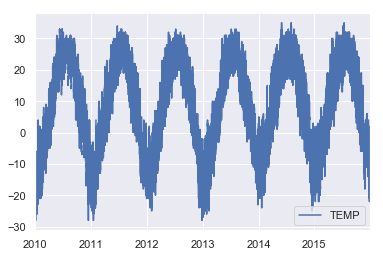

In [9]:
df_shenyang.plot(y=['TEMP'])

As you can see, it is very difficult to understand a pattern, although annual fluctuations can be easily seen. 
Below, there is a plot of temperature fluctuation in one single year.

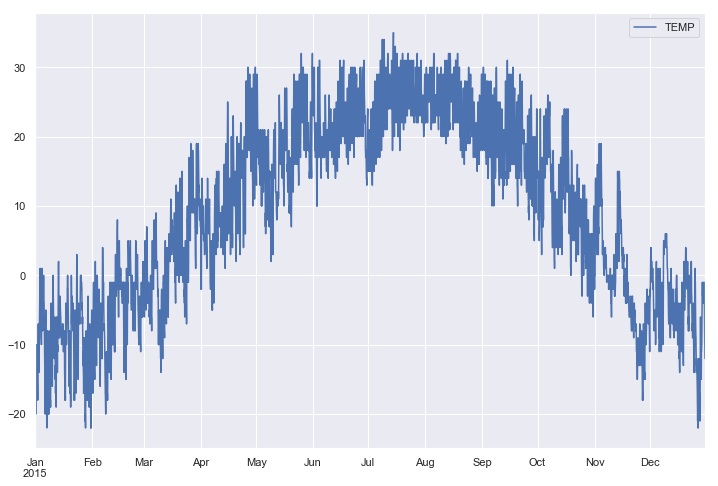

In [10]:
plt.rcParams['figure.figsize'] = [12.0, 8.0]
from datetime import datetime
start_date = datetime(2015, 1, 1)
end_date = datetime(2015, 12, 31)
df_shenyang[(start_date <= df_shenyang.index) & (df_shenyang.index <= end_date)].plot.line(y=['TEMP'])

As we can see, there are seasonal differences, with the temperature going up in March-April all the way upto the 30s in July which I am guessing is Peak Summer - and then falling again to lowest in Dec-Jan. 

Going even smaller in the time interval:

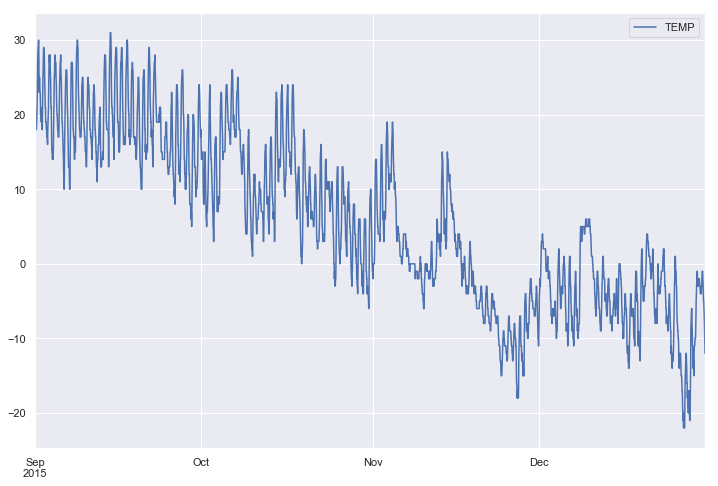

In [11]:
start_date = datetime(2015, 9, 1)
end_date = datetime(2015, 12, 31)
df_shenyang[(start_date <= df_shenyang.index) & (df_shenyang.index <= end_date)].plot.line(y=['TEMP'])

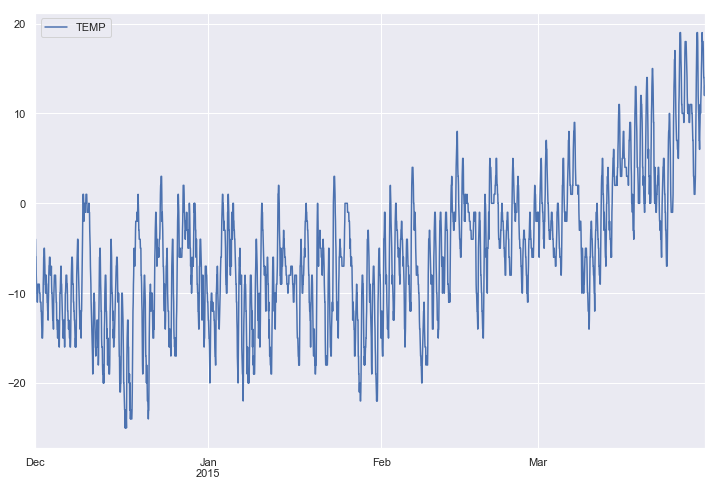

In [12]:
start_date = datetime(2014, 12, 1)
end_date = datetime(2015, 3, 31)
df_shenyang[(start_date <= df_shenyang.index) & (df_shenyang.index <= end_date)].plot.line(y=['TEMP'])

**Create a boxplot showing the temperature values aggregated by month for one of the five cities.**

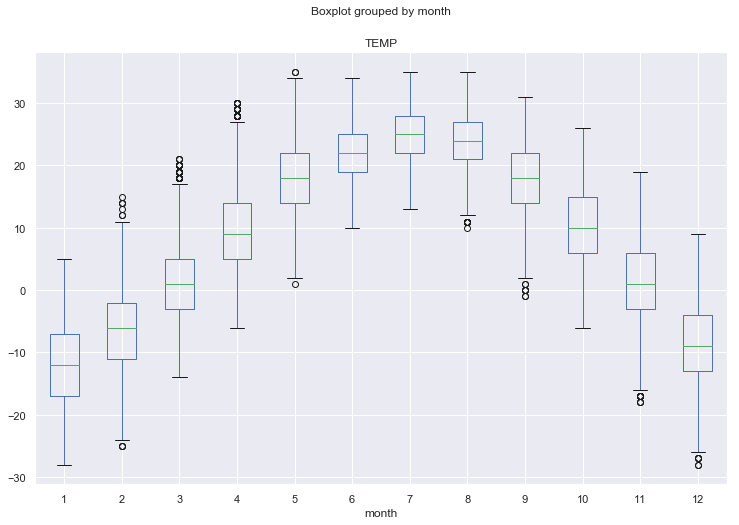

In [13]:
df_shenyang.boxplot(column='TEMP',by='month')

The range of temperatures is high, but the average temperatures themselves are highest in the months 5, 6, 7, 8 and lowest in months 1, 12 which is consistent with our seasonal temperature analysis.

** Create a scatter plot using two features of your choice. Choose a pair of features that you believe have some correlation between them. Based on your visualization, do they seem to be correlated?**

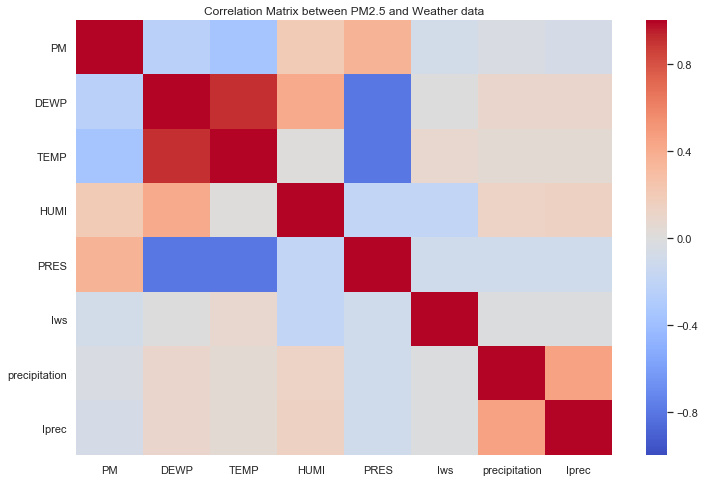

In [14]:
corr = df_shenyang[['PM','DEWP','TEMP','HUMI','PRES','Iws','precipitation','Iprec']].corr()
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='coolwarm')
_ = plt.title('Correlation Matrix between PM2.5 and Weather data')
plt.show()

PM2.5 levels are negatively correlated to dew point, temperature, wind speed and precipitation, and positivley correlated (very slightly) to pressure and humidity. Here is a scatter plot for the same:

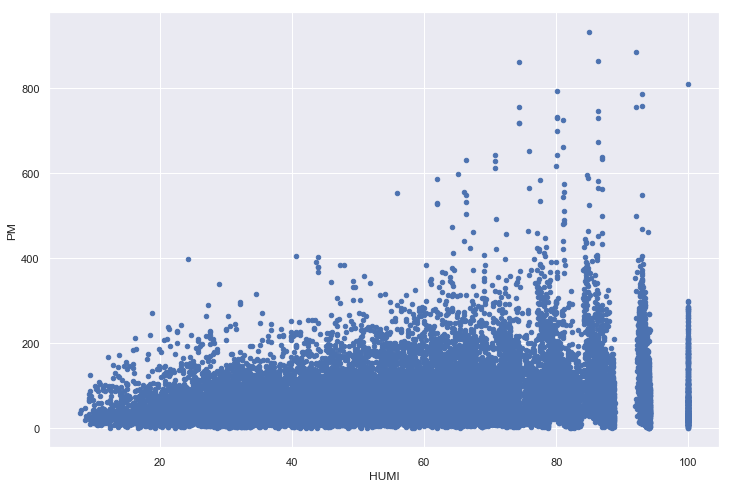

In [15]:
df_shenyang.plot.scatter(y='PM', x='HUMI')

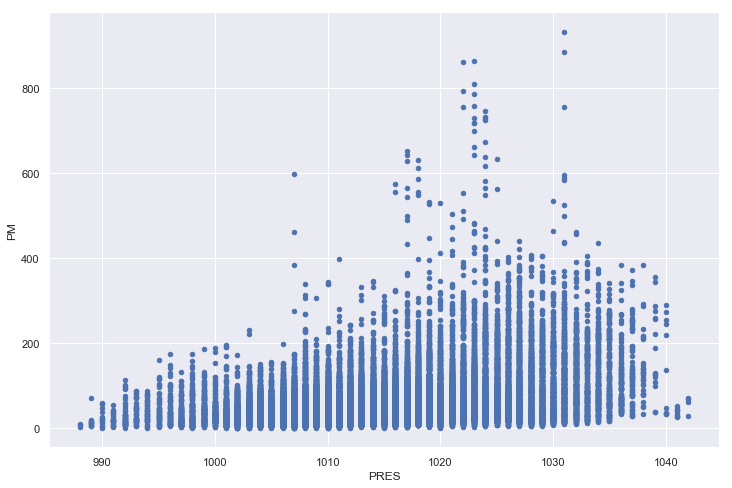

In [16]:
df_shenyang.plot.scatter(y='PM', x='PRES')

The reason I was looking at PM data is because it is the air quality data, and PM seems to be the most important feature. However, the TEMP and DEWP seem to be very positively correlated. Here is the scatter plot for them : 

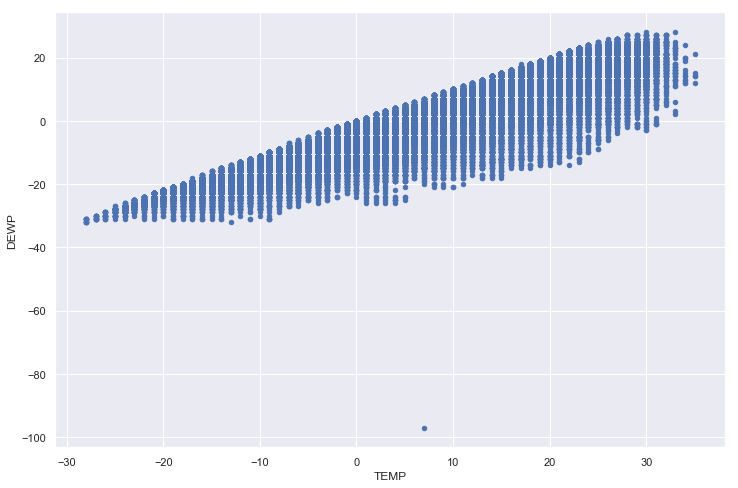

In [17]:
df_shenyang.plot.scatter(x='TEMP', y='DEWP')

Oh yes, very evident.

**Create a single plot that illustrates the value of the PM column over time for each of the four cities. Color and label each city differently so that they can be distinguished easily.**

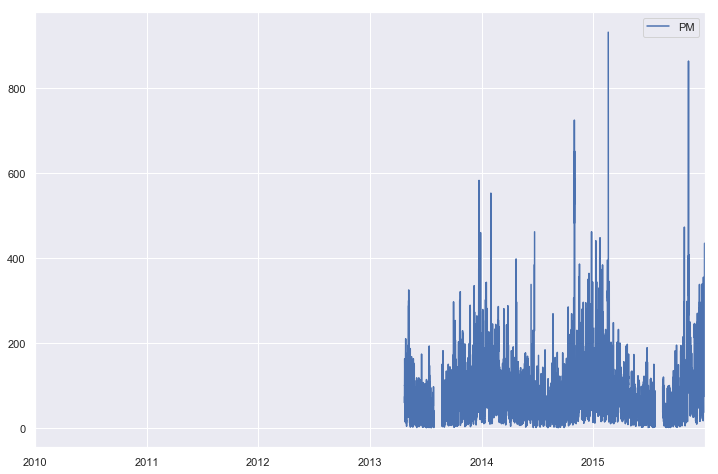

In [18]:
df_shenyang.plot(y=['PM'])

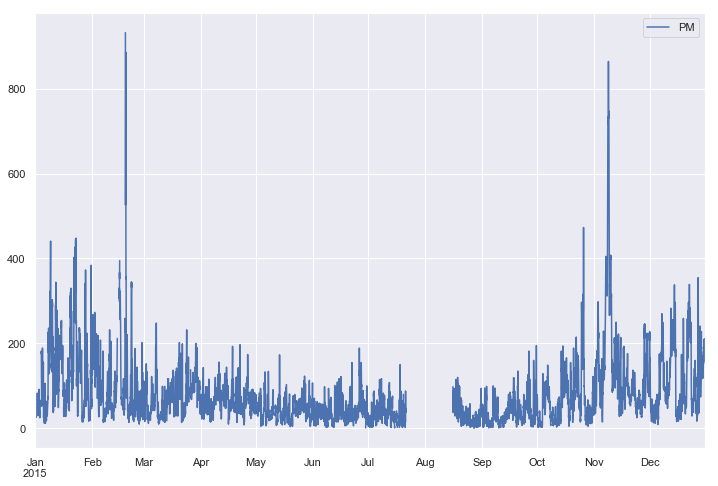

In [19]:
start_date = datetime(2015, 1, 1)
end_date = datetime(2015, 12, 31)
df_shenyang[(start_date <= df_shenyang.index) & (df_shenyang.index <= end_date)].plot.line(y=['PM'])

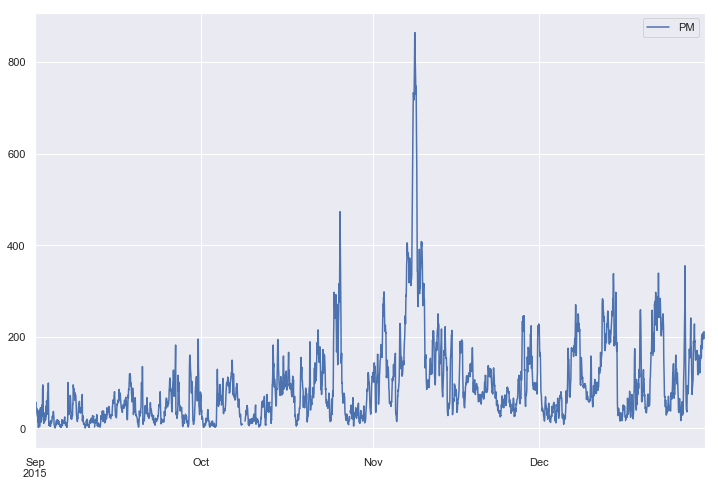

In [20]:
start_date = datetime(2015, 9, 1)
end_date = datetime(2015, 12, 31)
df_shenyang[(start_date <= df_shenyang.index) & (df_shenyang.index <= end_date)].plot.line(y=['PM'])

As you can see, it will be very difficult to visualise the PM values of all cities together if I use all the data-points. So I will be plotting the annual mean of PM values from 2010-2015 so that the values can be visualised easily. 

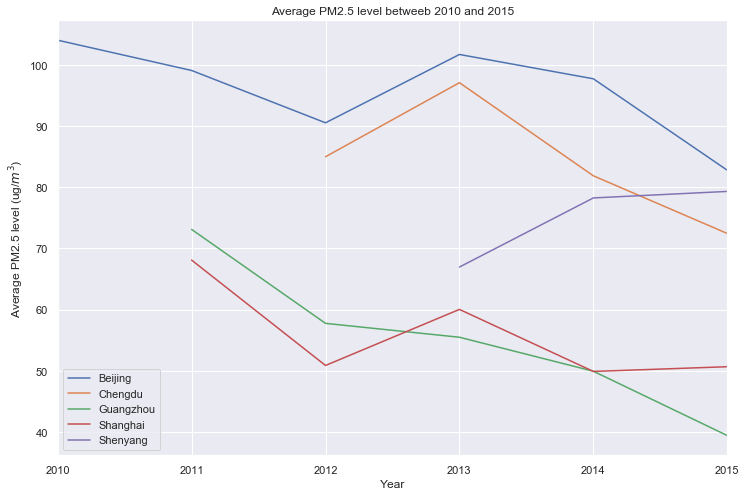

In [21]:
yearly_mean_beijing = pd.Series()
yearly_mean_chengdu = pd.Series()
yearly_mean_guangzhou = pd.Series()
yearly_mean_shanghai = pd.Series()
yearly_mean_shenyang = pd.Series()

yearly_mean_dict = { "Beijing" : yearly_mean_beijing,
               "Chengdu" : yearly_mean_beijing,
               "Guangzhou" : yearly_mean_guangzhou,
               "Shanghai" : yearly_mean_shanghai,
               "Shenyang" : yearly_mean_shenyang }

def plot_PM_all_cities(): 
    for city in cities_dict:
        cities_dict[city].set_index(pd.to_datetime(cities_dict[city][["year","month","day","hour"]]), inplace=True)
    for city in yearly_mean_dict:    
        yearly_mean_dict[city] = cities_dict[city].resample('A')['PM'].mean()
        yearly_mean_dict[city].plot(label=city)

    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Average PM2.5 level (ug/$m^3$)')
    plt.title('Average PM2.5 level betweeb 2010 and 2015')
    
plot_PM_all_cities()

## 1.3 Regression

**Train and evaluate (using r-squared) a linear regression model to predict the PM value. Repeat this for each city and be sure to evaluate your model using the X test set.**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
length = 2* len(df_beijing)
y_beijing, y_chengdu, y_guangzhou, y_shanghai, y_shenyang = pd.Series(), pd.Series(), pd.Series(), pd.Series(), pd.Series()
X_beijing, X_chengdu, X_guangzhou, X_shanghai, X_shenyang = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
X_train_beijing, X_train_chengdu, X_train_guangzhou, X_train_shanghai, X_train_shenyang = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
X_test_beijing, X_test_chengdu, X_test_guangzhou, X_test_shanghai, X_test_shenyang = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
y_train_beijing, y_train_chengdu, y_train_guangzhou, y_train_shanghai, y_train_shenyang = pd.Series(), pd.Series(), pd.Series(), pd.Series(), pd.Series()
y_test_beijing, y_test_chengdu, y_test_guangzhou, y_test_shanghai, y_test_shenyang = pd.Series(), pd.Series(), pd.Series(), pd.Series(), pd.Series()
y_pred_beijing, y_pred_chengdu, y_pred_guangzhou, y_pred_shanghai, y_pred_shenyang = np.array(length), np.array(length), np.array(length), np.array(length), np.array(length)
linreg_beijing, linreg_chengdu, linreg_guangzhou, linreg_shanghai, linreg_shenyang = LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()
r2_beijing, r2_chengdu, r2_guangzhou, r2_shanghai, r2_shenyang = 0.0, 0.0, 0.0, 0.0, 0.0

city_wise_regression_dict = {"Beijing" : [y_beijing, X_beijing, X_train_beijing, X_test_beijing, y_train_beijing, y_test_beijing, linreg_beijing, y_pred_beijing, r2_beijing],
               "Chengdu" : [y_chengdu, X_chengdu, X_train_chengdu, X_test_chengdu, y_train_chengdu, y_test_chengdu, linreg_chengdu, y_pred_chengdu, r2_chengdu],
               "Guangzhou" : [y_guangzhou, X_guangzhou, X_train_guangzhou, X_test_guangzhou, y_train_guangzhou, y_test_guangzhou, linreg_guangzhou, y_pred_guangzhou, r2_guangzhou],
               "Shanghai" : [y_shanghai, X_shanghai, X_train_shanghai, X_test_shanghai, y_train_shanghai, y_test_shanghai, linreg_shanghai, y_pred_shanghai, r2_shanghai],
               "Shenyang" : [y_shenyang, X_shenyang, X_train_shenyang, X_test_shenyang, y_train_shenyang, y_test_shenyang, linreg_shenyang, y_pred_shenyang, r2_shenyang]}

In [24]:
for city in city_wise_regression_dict:
    
    df_city = cities_dict[city]
    list_attr = city_wise_regression_dict[city]
    
    df_city = df_city.dropna()
    y = list_attr[0]
    X = list_attr[1]
    X_train = list_attr[2]
    X_test = list_attr[3]
    y_train = list_attr[4]
    y_test = list_attr[5]
    linreg = list_attr[6] 
    y_pred = list_attr[7]
    r2 = list_attr[8]
    
    y = df_city['PM']
    X = df_city.drop(['PM'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
   
    r2 = metrics.r2_score(y_test,y_pred)
    print("City :", city, ", R2 value:", str(r2))

City : Beijing , R2 value: 0.26950638719252273
City : Chengdu , R2 value: 0.2741246285283515
City : Guangzhou , R2 value: 0.14467127942864744
City : Shanghai , R2 value: 0.17181420137417514
City : Shenyang , R2 value: 0.21522311748622325


This suggests that the moving average patterns in the time series alone are not enough to predict multiple steps into the future. There are other underlying factors causing non-repetitive changes in PM2.5 values.

**Use the dataset for one city of your choice for training and evaluate your linear regression on the dataset of another city. How do your results compare to when you used data from the same city for both training and testing?**

Using model from Shanghai to predict Shengyan

In [25]:
df_shanghai = df_shanghai.dropna()
y = df_shanghai['PM']
X = df_shanghai.drop(['PM'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
df_shenyang = df_shenyang.dropna()
y_pred = linreg.predict(df_shenyang.drop(['PM'], axis=1))
r2 = metrics.r2_score(df_shenyang['PM'],y_pred)
print(str(r2))

0.0625664716959956


Using model from Beijing to predict Chengdu

In [26]:
df_beijing = df_beijing.dropna()
y = df_beijing['PM']
X = df_beijing.drop(['PM'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
df_chengdu = df_chengdu.dropna()
y_pred = linreg.predict(df_chengdu.drop(['PM'], axis=1))
r2 = metrics.r2_score(df_chengdu['PM'],y_pred)
print(str(r2))

-0.23369119895555657


I was confused why the R2 value is negative, because I assumed that R2 is always between 0 and 1, but a stack overflow post helped: 
```
𝑅2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. 
```

Thus, the results get worse than they already were if I use a different dataset to train and test my model. It only goes to confirm that there are more underlying causes to fluctuations in PM than the moving-average time series of the parameters we are using.

**Using a city of your choice, train and evaluate a linear regression to predict the values of one of the other columns (not PM). Is there a particular column that seems to be easier to predict than others? Why do you think that is?**

In [27]:
for city in city_wise_regression_dict:
    df_city = cities_dict[city]
    list_attr = city_wise_regression_dict[city]
    df_city = df_city.dropna()
    y = list_attr[0]
    X = list_attr[1]
    X_train = list_attr[2]
    X_test = list_attr[3]
    y_train = list_attr[4]
    y_test = list_attr[5]
    linreg = list_attr[6] 
    y_pred = list_attr[7]
    r2 = list_attr[8]
    
    y = df_city['TEMP']
    X = df_city.drop(['TEMP'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    r2 = metrics.r2_score(y_test,y_pred)
    print("City :", city, str(r2))
    

City : Beijing 0.9683004265761639
City : Chengdu 0.9881272900394341
City : Guangzhou 0.8451197721669657
City : Shanghai 0.992046622730797
City : Shenyang 0.9855543780612581


I would assume that predicting temperature will be easy since it follows a seasonal pattern - up and down as the seasons progress. Also that the meteorological data available other than the temp will have more effect on the temp than they do on PM. So we can easily use that data to predict the temperature. I predicted Temperature using Linear Regression for all the cities.

# BONUS

**If you had to choose one of these cities as your next home, based on the data you analyzed from these datasets, which one would you choose?**

Since we are looking at the air quality data, and given China's reputation for being very polluted,  it was most reasonable to first look at a comparison between air quality of the different cities. We did some preliminary analysis using average PM values earlier. 

DISCLAIMER : I used a LOT of medium and Stack Overflow for help with the upcoming plots - I don't have the links anymore, but if you need them, I can try to find them. :) 

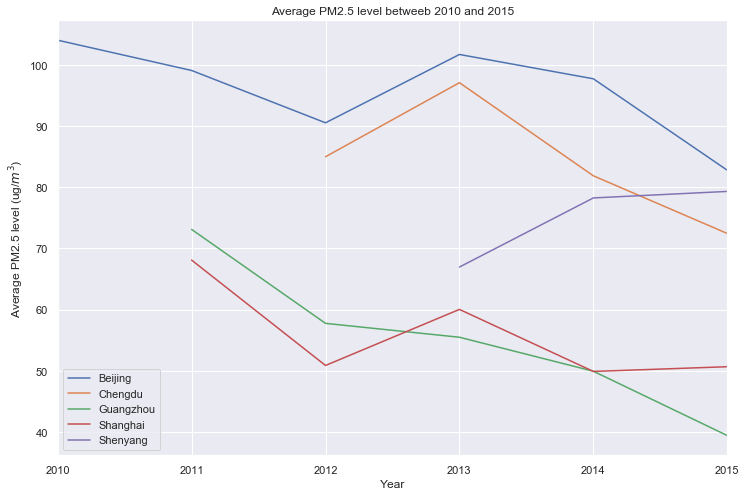

In [28]:
plot_PM_all_cities()

Some more detailed analysis: 

In [29]:
df_PM_by_city = pd.DataFrame()
for city in cities:
    df_PM_by_city[city] = cities_dict[city]['PM']

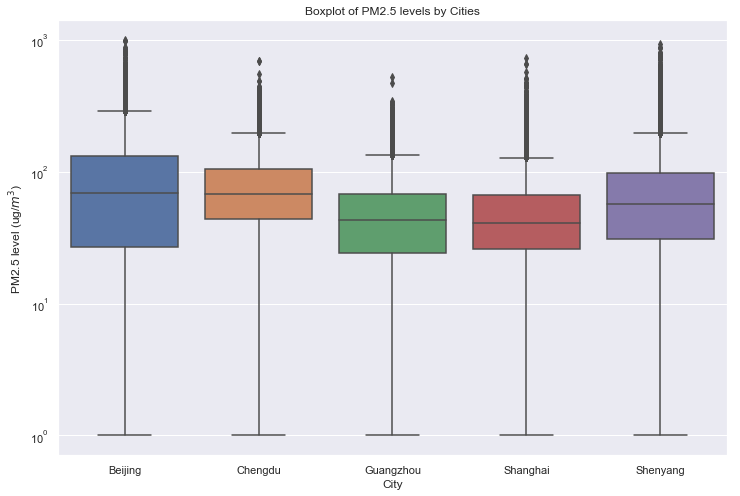

In [30]:
# PM boxplot for all five cities
sns.boxplot(data=df_PM_by_city)
plt.yscale('log') # set y axis to logrithmic scale for better visualization of the interquantile range
plt.xlabel('City')
plt.ylabel('PM2.5 level (ug/$m^3$)')
plt.title('Boxplot of PM2.5 levels by Cities');


Now plotting the PDF for all the cities : 

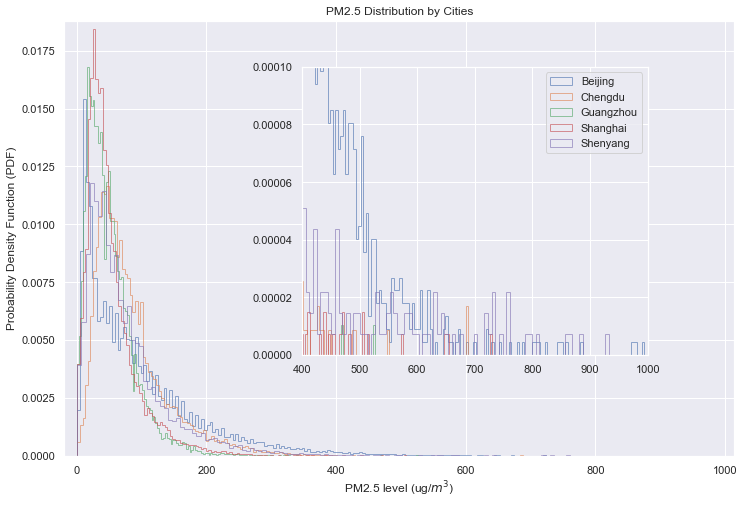

In [31]:
for city in df_PM_by_city.columns:
    series = df_PM_by_city[city].dropna()
    n_bins = int(np.sqrt(len(series)))
    plt.hist(series, bins=n_bins, density=True, histtype='step', alpha=0.6)

plt.xlabel('PM2.5 level (ug/$m^3$)')
plt.ylabel('Probability Density Function (PDF)')
plt.title('PM2.5 Distribution by Cities')
plt.margins(0.02)

# Zoomed inset feature : Reference : Towards Data Science on Medium 
plt.axes([0.4,0.3,0.4,0.5])
for city in df_PM_by_city.columns:
    series = df_PM_by_city[city].dropna()
    n_bins = int(np.sqrt(len(series)))
    plt.hist(series, bins=n_bins, density=True, histtype='step', alpha=0.6)

#format and annotate the figure insert
plt.xlim([400,1000])
plt.ylim([0,0.0001])
plt.legend(df_PM_by_city.columns, loc='upper right');

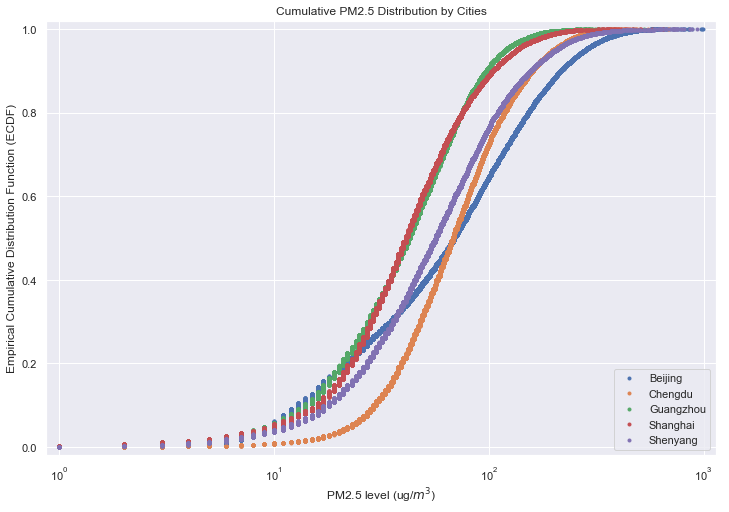

In [32]:
# user-defined funciton for computing ECDF of a given array [Source : StackOverflow]
def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    #sort array to use as the x axis
    x = np.sort(array)
    #use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    #return x and y as the data for x axis and y axis, repectively
    return x,y

for city in df_PM_by_city.columns:
    series = df_PM_by_city[city].dropna()
    x, y = ecdf(series)
    plt.plot(x, y, marker = '.', linestyle='none')


plt.xscale('log')
plt.legend(df_PM_by_city.columns, loc='lower right')
plt.xlabel('PM2.5 level (ug/$m^3$)')
plt.ylabel('Empirical Cumulative Distribution Function (ECDF)')
plt.title('Cumulative PM2.5 Distribution by Cities')
plt.margins(0.02)

Now time for some summary stats regarding the PM: 

In [33]:
df_PM_by_city.describe()

,Beijing,Chengdu,Guangzhou,Shanghai,Shenyang
count,50387.000000,28900.000000,32352.000000,34039.000000,21680.00000
mean,95.904241,83.407612,50.803938,52.910544,75.83750
std,91.643772,57.239585,36.927474,42.576138,68.99593
min,1.000000,1.000000,1.000000,1.000000,1.00000
25%,27.000000,44.000000,24.000000,26.000000,31.00000
50%,69.000000,68.000000,43.000000,41.000000,57.00000
75%,132.000000,105.000000,68.000000,67.000000,97.00000
max,994.000000,688.000000,526.000000,730.000000,932.00000


Thus, with enough analysis on the data, we can be convinced that there is a significant difference between the 5 cities in terms of their PM Levels. 

Beijing has the widest spread of PM2.5 values among the 5 cities. Even though it has the largest number of low PM days, it also has the largest number of high PM2.5 days. So it is easy to conclude that I will NOT want to live in Beijing. 

From the other cities, **Guangzhou** has the lowest number of high PM2.5 days as well as the lowest median.(even lower than Shanghai) In fact, it also has the overall lowest PM2.5 readings, which are consistentlt decreasing. Thus, Guangzhou has a very high chance of being the place I would want to live in. 

If I look at all the other meteorological factors that have been provided along with the PM Data, none of them matter too much to me. I come from India, where we have extremely high and extremely low temperatures and then I lived in Hong Kong, where it is always hot and humid. However, now that I think about it, Guangzhou will have a very similar weather to Hong Kong given their proximity. So it is a no-brainer for me to move to Guangzhou! 

In a nutshell, the most important factor for me to move to one of the five cities in China is the air-quality given the metrics. 